In [1]:
api_key = "bnxms2gPTKqBF9YjsHQIeemKdr9FdjXU0AytLGCF"

In [2]:
import json,requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
start_date = "2020-06-18"
end_date = "2020-06-18"
url = "https://api.nasa.gov/neo/rest/v1/feed?start_date={}&end_date={}&api_key={}".format(start_date,end_date,api_key)

In [4]:
requests = requests.get(url)
result = requests.json()
result

{'links': {'next': 'http://www.neowsapp.com/rest/v1/feed?start_date=2020-06-19&end_date=2020-06-19&detailed=false&api_key=bnxms2gPTKqBF9YjsHQIeemKdr9FdjXU0AytLGCF',
  'prev': 'http://www.neowsapp.com/rest/v1/feed?start_date=2020-06-17&end_date=2020-06-17&detailed=false&api_key=bnxms2gPTKqBF9YjsHQIeemKdr9FdjXU0AytLGCF',
  'self': 'http://www.neowsapp.com/rest/v1/feed?start_date=2020-06-18&end_date=2020-06-18&detailed=false&api_key=bnxms2gPTKqBF9YjsHQIeemKdr9FdjXU0AytLGCF'},
 'element_count': 12,
 'near_earth_objects': {'2020-06-18': [{'links': {'self': 'http://www.neowsapp.com/rest/v1/neo/54017378?api_key=bnxms2gPTKqBF9YjsHQIeemKdr9FdjXU0AytLGCF'},
    'id': '54017378',
    'neo_reference_id': '54017378',
    'name': '(2020 LH)',
    'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54017378',
    'absolute_magnitude_h': 22.189,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.0969962572,
      'estimated_diameter_max': 0.2168902247},
     'meters': {'estimated

In [5]:
result = result['near_earth_objects'] 
result

{'2020-06-18': [{'links': {'self': 'http://www.neowsapp.com/rest/v1/neo/54017378?api_key=bnxms2gPTKqBF9YjsHQIeemKdr9FdjXU0AytLGCF'},
   'id': '54017378',
   'neo_reference_id': '54017378',
   'name': '(2020 LH)',
   'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=54017378',
   'absolute_magnitude_h': 22.189,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.0969962572,
     'estimated_diameter_max': 0.2168902247},
    'meters': {'estimated_diameter_min': 96.9962572363,
     'estimated_diameter_max': 216.8902247435},
    'miles': {'estimated_diameter_min': 0.0602706614,
     'estimated_diameter_max': 0.1347692958},
    'feet': {'estimated_diameter_min': 318.2292005912,
     'estimated_diameter_max': 711.5821249473}},
   'is_potentially_hazardous_asteroid': False,
   'close_approach_data': [{'close_approach_date': '2020-06-18',
     'close_approach_date_full': '2020-Jun-18 15:00',
     'epoch_date_close_approach': 1592492400000,
     'relative_velocity': {'kilom

In [6]:
list_dates = []
for date in result.keys():
    list_dates.append(date)
list_dates

['2020-06-18']

In [7]:
data = dict()

In [9]:
df_ast = pd.DataFrame(columns = ['name','miss distance','closest approach time'])
for asteroid in range(len(result[list_dates[0]])):
    data['name'] = result[list_dates[0]][asteroid]['name']
    data['miss distance'] = int(float(result[list_dates[0]][asteroid]['close_approach_data'][0]['miss_distance']['miles']))
    data['closest approach time'] = result[list_dates[0]][asteroid]['close_approach_data'][0]['close_approach_date_full'].split(' ')[1]
    df_ast = df_ast.append(data,ignore_index=True)
df_ast

,name,miss distance,closest approach time
0,(2020 LH),14674101,15:00
1,162210 (1999 SM5),28360621,01:28
2,382503 (2001 RE8),15718572,03:17
3,(2008 LW16),41356794,00:12
4,(2011 TO),31349162,03:29
5,(2015 RK82),35955000,22:52
6,(2017 QM18),26207449,12:58
7,(2011 FR29),43383029,04:15
8,(2019 YC2),8492556,03:13
9,(2020 AY1),25160642,16:08


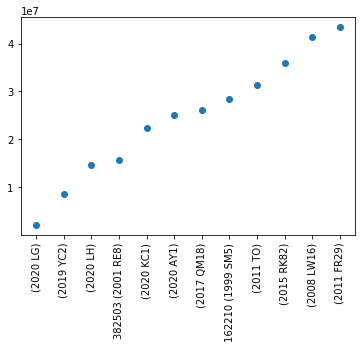

In [10]:
df_ast.sort_values(by=['miss distance'],inplace=True)
plt.scatter(df_ast['name'],df_ast['miss distance'])
plt.xticks(rotation = 90)
plt.show()

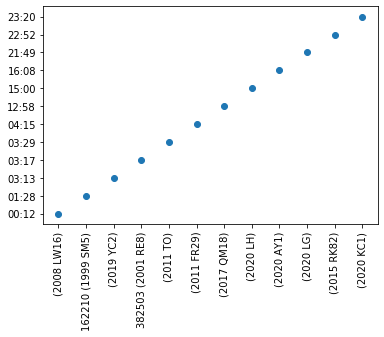

In [11]:
df_ast.sort_values(by=['closest approach time'],inplace=True)
plt.scatter(df_ast['name'],df_ast['closest approach time'])
plt.xticks(rotation = 90)
plt.show()